## Tech Challenge <01>

### Grupo

### Curso
Pós graduação em IA para Devs

### Desafio


Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

```bash
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```

Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.

#### Tarefas

##### Exploração de dados
- Carregue a base de dados e explore suas características.
- Analise estatísticas descritivas e visualize distribuições relevantes.

##### Pré-processamento de dados
- Realize a limpeza dos dados, tratando valores ausentes (se necessário).
- Converta variáveis categóricas em formatos adequados para modelagem.

##### Modelagem
- Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
- Divida o conjunto de dados em conjuntos de treinamento e teste.

##### Treinamento e avaliação do modelo
- Treine o modelo com o conjunto de treinamento.

##### Validação estatística
- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

##### O que avaliaremos
Apresente resultados visuais, como gráficos de previsões vs. valores reais.

##### Observações
Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.


### Base de dados

Nossa base de dados se encontra para download no [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance).

Trata-se de um levantamento de um plano de saúde, mostrando a relação do custo das despesas médicas e as características de cada beneficiário do seguro.

#### Colunas

- age: Idade do beneficiário

- sex: Gênero do contratante do seguro (male, female)

- bmi: Índice de massa corporal, que fornece uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg/m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9

- children: Numéro de filhos / dependentes cobertos pelo seguro

- smoker: Fumante

- region: Área onde o beneficiário reside nos Estados Unidos (northeast, southeast, southwest, northwest).

- charges: Despesas médicas individuais pagas pelo seguro de saúde

## Get Started

#### Imports

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Configurações

In [3]:
np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [53]:
def print_model_stats(y_test, y_predictions):
    erro_medio_quadratico = mean_squared_error(y_test, y_predictions)
    erro_medio_absoluto = mean_absolute_error(y_test, y_predictions)
    r_quadrado = r2_score(y_test, y_predictions)

    print(f'Mean Square Error: {erro_medio_quadratico:4f}')
    print(f'Mean Absolute Error: {erro_medio_absoluto:4f}')
    print(f'R² (determination coefficient): {r_quadrado:4f}')

#### Carregando os dados

Utilizando o pandas para carregar a base de dados `.csv` e mostrando as primeiras 5 linhas da tabela com `dados.head()`

In [4]:
dados = pd.read_csv('insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Usando `dados.shape` para mostrar a quantidade de linhas e colunas. Nessa base de dados temos 1338 linhas e 7 colunas

In [5]:
dados.shape

(1338, 7)

#### Analisando os dados

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analisando as informações da base de dados, vemos que não existe nenhum dado nulo e que há 3 tipos diferentes de dados (int64, object e float64)

In [7]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Verificando dados nulos

In [8]:
dados.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Verificando divisão dos valores para coluna smoker

In [9]:
dados[['smoker']].value_counts()

,count
smoker,
no,1064
yes,274


Verificando divisão dos valores para coluna sex

In [10]:
dados[['sex']].value_counts()

,count
sex,
male,676
female,662


### Pré-processamento dos dados

Coluna **region** podemos transformar em rótulos numéricos usando get_dummies do pandas, pois há múltiplas categorias envolvidas

In [11]:
categoric_columns = ['region']

dados = pd.get_dummies(dados, columns = categoric_columns, dtype=int)
dados.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


Colunas **sex** e **smoker** podemos transformar em valores binários (0 ou 1) usando LabelEncoder, pois há apenas 2 categorias

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
dados.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### Análise gráfica

O gráfico abaixo mostra a relação entre o custo do plano em função da quantidade de filhos/dependentes que o beneficiário tem. Não nos diz muita coisa

<Axes: xlabel='children', ylabel='charges'>

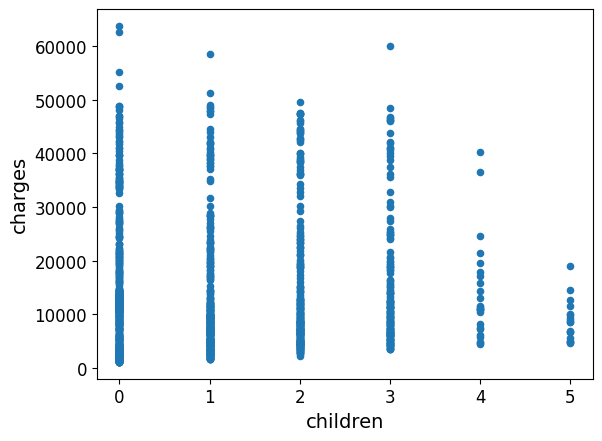

In [13]:
dados.plot.scatter(x='children', y='charges')

O gráfico abaxo mostra a relação entre o custo do plano em função se o beneficiário é ou não fumante. Nesse levantamento podemos ver que há uma diferença, o valor do plano é menor em usuários não fumantes se comparados aos usuário fumantes. Pode ser uma boa característica para nosso target

<Axes: xlabel='smoker', ylabel='charges'>

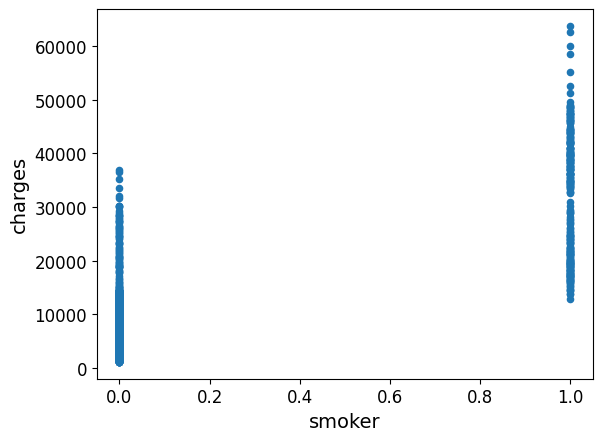

In [14]:
dados.plot.scatter(x='smoker', y='charges')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'region_northeast'}>,
        <Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>],
       [<Axes: title={'center': 'region_southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

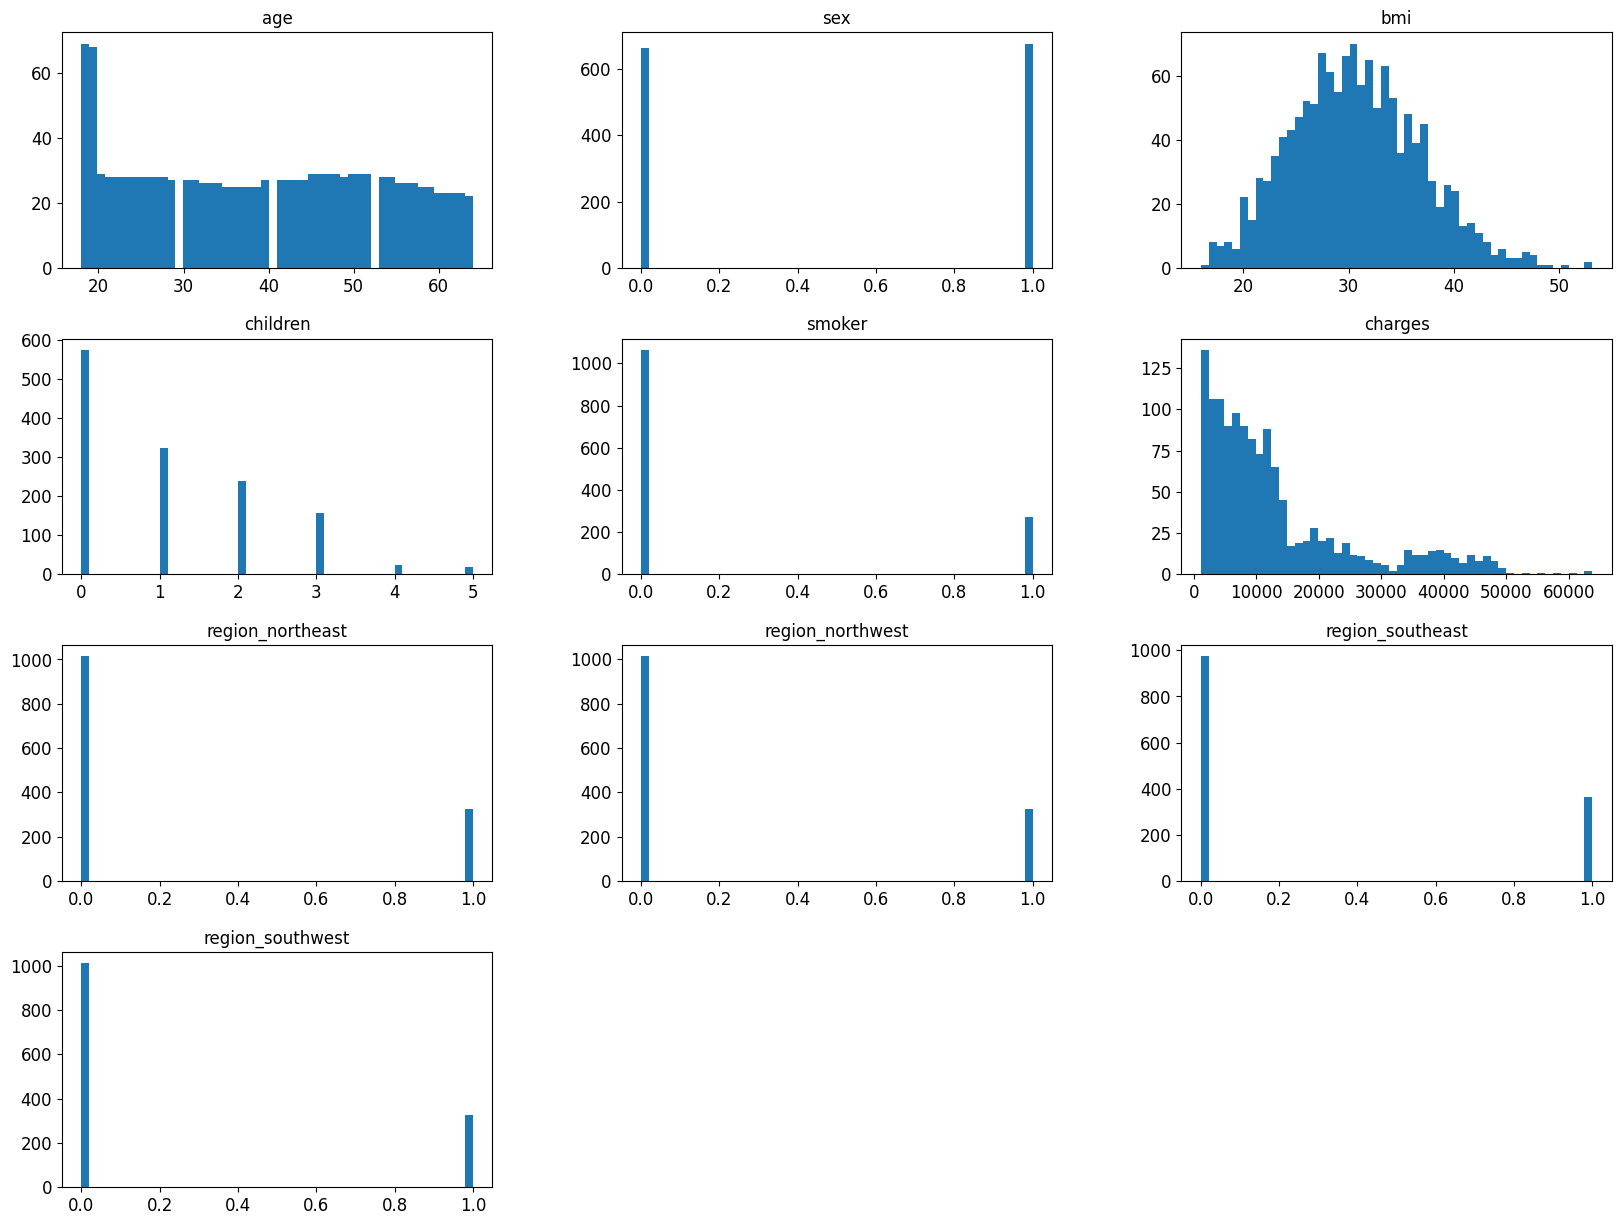

In [16]:
dados.hist(bins=50, figsize=(20,15))

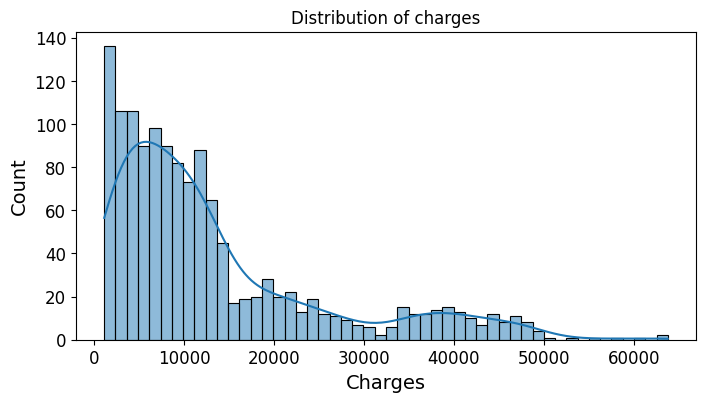

In [18]:
# grafico com a distribuição dos valores de cobrança
plt.figure(figsize=(8, 4))
sns.histplot(dados['charges'], bins=50, kde=True)
plt.title('Distribution of charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

**Matriz de correlação**  
Podemos visualizar que a maior correlação da coluna charges (target) é com a coluna smoker

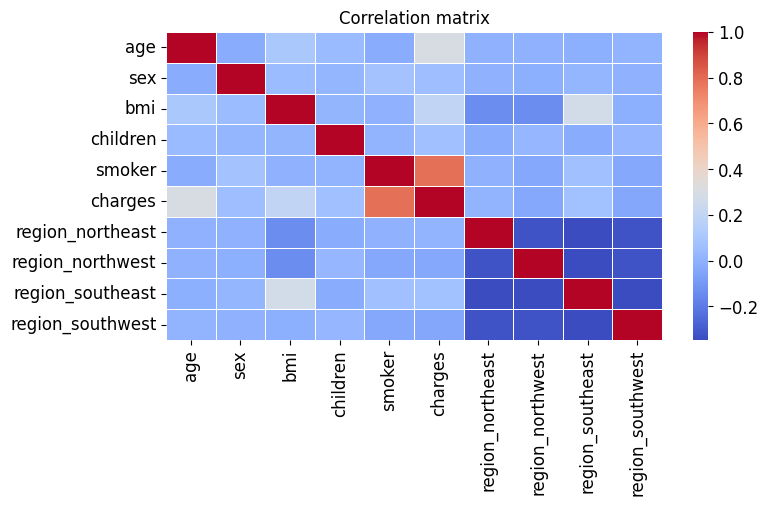

In [19]:
# matriz de correlação
correlation_matrix = dados.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')
plt.show()

# Regressão linear simples - divisão dos dados para treino e teste

usando somente coluna smoker - para avaliar com uma regressão linear simples

In [90]:
x = dados[['smoker']]
y = dados['charges'] # Target

In [91]:
x.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [92]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [93]:
x.shape, y.shape

((1338, 1), (1338,))

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train), "treinamento +", len(x_test), "teste")

1070 treinamento + 268 teste


## Criando modelo

In [95]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [96]:
y_predictions = model.predict(x_test)

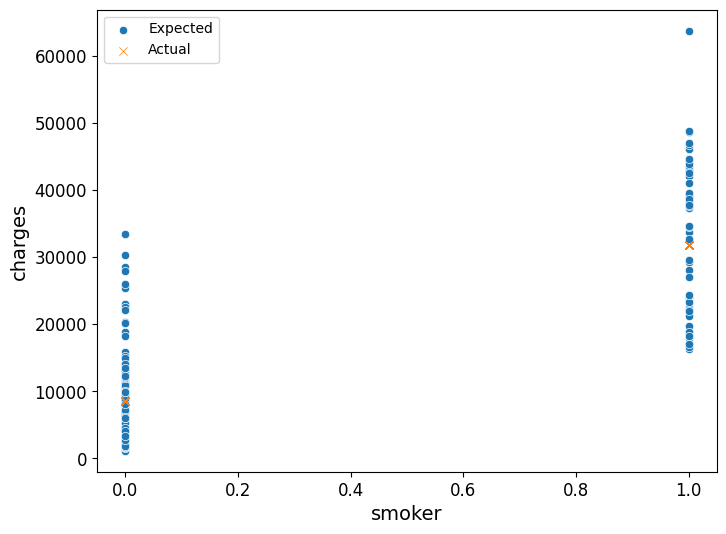

In [100]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test['smoker'], y=y_test, label='Expected')
sns.scatterplot(x=x_test['smoker'], y=y_predictions, label='Actual', marker='x')
plt.legend()
plt.show()

## Avaliando performance

In [101]:
print_model_stats(y_test, y_predictions)

Mean Square Error: 52745964.727526
Mean Absolute Error: 5625.810656
R² (determination coefficient): 0.660249


# Regressão linear múltipla - divisão dos dados para treino e teste

usando todas colunas - variáveis independentes, para avaliar com uma regressão linear múltipla

In [104]:
x = dados.drop(columns=['charges'])
y = dados['charges'] # Target

In [105]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [106]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [107]:
x.shape, y.shape

((1338, 9), (1338,))

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train), "treinamento +", len(x_test), "teste")

1070 treinamento + 268 teste


## Criando modelo

In [109]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [110]:
y_predictions = model.predict(x_test)

## Avaliando performance

In [113]:
print_model_stats(y_test, y_predictions)

Mean Square Error: 33596915.851361
Mean Absolute Error: 4181.194474
R² (determination coefficient): 0.783593


# Árvore de regressão - divisão dos dados para treino e teste

usando todas colunas - variáveis independentes, para avaliar com uma árvore de regressão

In [127]:
x = dados.drop(columns=['charges'])
y = dados['charges'] # Target

In [128]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [116]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [129]:
x.shape, y.shape

((1338, 9), (1338,))

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train), "treinamento +", len(x_test), "teste")

1070 treinamento + 268 teste


## Criando modelo

In [131]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [132]:
y_predictions = model.predict(x_test)

## Avaliando performance

In [133]:
print_model_stats(y_test, y_predictions)

Mean Square Error: 42821296.594674
Mean Absolute Error: 3100.278964
R² (determination coefficient): 0.724176
